## Thermal Imaging Analysis, Week 2: Temperature and Radiative Power

 ### ENRG 421, Spring 2025

I. <font color=green>***Introduction***<font color=black>

In Week 2 of the thermal imaging lab, we will apply the Python tools we studied last week (and introduce a few more) to analyze temeperature data from a commercial thermal imager. As with the Week 1 notebook, every time you see a <font color=purple>***Try it out for yourself:***<font color=black> prompt, you should edit or provide new code in the cell below the prompt. Likewise, every time you see a <font color=purple>***Questions for reflection:***<font color=black> prompt, please provide your answer(s) to the question(s) that follow the prompt in the Markdown cells immediately following each question.
    
As a reminder, here are the overall goals for Weeks 1 and 2 on Thermal Imaging Analysis:


II. <font color=green>***Goals***<font color=black>
* To gain experience reading and interpreting snippets of real Python code
* To gain experience navigating and using a Jupyter notebook to run and edit Python code
* To analyze a thermal (IR) image by using and modifying a provided Python script

III. <font color=green>***Thermal imaging with the Fluke TiS75 Thermal Imager***<font color=black>

Some of the data and images we'll work with in this lab were obtained from the web. Others were generated using a Fluke TiS75 Thermal Imager that is available for lending through the Institute for Energy Studies' [Energy Tool Lending Library](https://energy.wwu.edu/ies-resources "Energy Tool Lending Library"). Please watch the brief (7-minute) video below introducing the use of this instrument for thermal inspection of a motor.

[![Fluke Thermal Inpsection](http://img.youtube.com/vi/EH70_pM2TEM/0.jpg)](http://www.youtube.com/watch?v=EH70_pM2TEM)

<font color=purple>***Questions for Reflection:***<font color=black> 

1. How does thermal imaging allow the inspector to diagnose problems with the motor?

2. Briefly (1-3 sentences) describe the operation of the thermal camera as you would to a friend or colleague who has not seen the video.

3. The inspector says the slightly higher temperature observed on the motor coupling "might be an emissivity issue" (5:10). Based on the inspector's description of emissivity (4:43-5:00), explain in your own words why the inspector is not particularly worried about the temperature difference on this particular part of the motor.

IV. <font color=green>***Importing temperature data***<font color=black>

Let's import temperature data from a thermal image of a light switch. A visible-light image of the light switch is shown below for the sake of reference (at not quite the same angle, but close).

<img src=https://raw.githubusercontent.com/timkowalczyk/enrg421/master/LightSwitch.jpg width=400 height=300>

The temperature data is stored in a comma-separated value file (.csv). We can import the data into Python with the following code snippet. Please note that in order for this command to work, **you must have a copy of the data file LightSwitch.csv in the same folder on your computer as this Jupyter notebook**. The data file is available for download through Canvas, [or you can try this direct link](https://wwu.instructure.com/files/64020139/download?download_frd=1).

In [1]:
from csv import reader
from numpy import array, zeros

xrange = 320 # Resolution of image along x-axis
yrange = 240 # Resolution of image along y-axis
T = [[]] # Empty array to store temperature data

datafilename = 'LightSwitch.csv'
with open(datafilename) as csv_file:
    csv_reader = reader(csv_file)
    linecounter = 0
    for row in csv_reader:
        data = [float(x) for x in row] # Convert temperature data from strings to numbers
        T.append(data)  
T = T[1:] # Removes the empty first cell of data from our T matrix

csv_file.close()

<font color=purple>***Try it out for yourself:***<font color=black> We imported the data, but we haven't displayed it yet. To view the raw temperature data, go ahead and write a one-line code snippet to print the matrix `T` in the space below. *Hint:* In Python 3, the `print` function requires parentheses containing the object to be printed.

<font color=purple>***Question for reflection:***<font color=black> Does this matrix look like you would expect it to? Are the apparent number of entries, magnitudes of values, etc consistent with what you would anticipate? Briefly explain.

The raw data is useful for processing but not for visualization. Let's use Python's matplotlib library to visualize the temperature data on a standard color map:

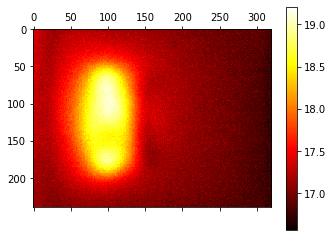

In [2]:
import matplotlib.pyplot as plt # Matplotlib plotting tools
from matplotlib import cm       # Matplotlib colormap tools
from IPython.display import display

from numpy import power

plt.matshow(T)
plt.set_cmap('hot') # Other options include autumn, spring, Wistia, afmhot, etc
plt.colorbar()
plt.show()


<font color=purple>***Question for reflection:***<font color=black> Looking first at the light switch data: what details, if any, from the visible-light image can you make out within the IR image (temperature data)?

<font color=purple>***Try it out for yourself:***<font color=black> There is another data file on Canvas called ["mystery.csv"](https://wwu.instructure.com/files/64022151/download?download_frd=1). The file contains temperature data for a household item that I measured with the Fluke TiS75. In the **Code** cell below, copy/paste and edit code snippets from this section of the notebook to visualize the temperature data for the object in "mystery.csv" as a heat map. Please do all of the work in the cell below, in other words, do not overwrite the information in the cells above.

<font color=purple>***Question for reflection:***<font color=black> What do you think the mystery object is? Look closely and support your guess with evidence from your thermal image.

V. <font color=green>***Processing temperature data to produce a power spectrum***<font color=black>

In ENRG 320 we learned that most objects are constantly radiating energy simply due to their having a finite temperature; physicists call this "blackbody radiation". The power associated with this radiation is related to the object's temperature by a power law,

$P = \sigma A T^4$

where $\sigma = 5.67 \times 10^{-8}\,\mathrm{W/m}^2\,\mathrm{K}^4$ is the Stefan-Boltzmann constant, $A$ is the object's surface area, and $T$ is the temperature in K.

In the video at the beginning of this Jupyter notebook, the engineer mentioned the emissivity of a material as a potential issue in interpreting a thermal image. One way to think about emissivity is that it describes the extent to which an object behaves like a blackbody, with emissivity $\epsilon = 1$ for a perfect blackbody and $\epsilon < 1$ for objects whose emission spectra deviate from that of a blackbody. We can make this statement more precise by saying that the emissivity modulates the observed power according to a more generalized form of the Stefan-Boltzmann law,

$P = \sigma \epsilon A T^4$

This more general formula is more appropriate for the analysis of images that include one or more low-emissivity regions (metal surfaces are a typical example). By transforming our matrix of raw temperature data using the Stefan-Boltzmann formula, we can convert a thermal image into an image representing the **power spectrum** of the objects in the image.

<font color=purple>***Try it out for yourself:***<font color=black> Using the simplified Stefan-Boltzmann law ($\epsilon = 1$) as your guide, write a short Python code snippet that produces the power spectrum from the mystery image data (mystery.csv). Assume that each pixel in the thermal image represents an area of approximately 1 mm x 1 mm. Within the code, write a one-line **comment** (by placing a #hashtag before the text) for a future reader of your code that indicates the *units* of the power computed by your code.
    
*Hints*:
1. Multiplying a scalar by a matrix (numpy array) in Python works as you might expect it to: it multiplies each element of the matrix by that same scalar.
2. Raising the elements of a matrix (numpy array) in Python to a power *doesn't* work as you might expect it to: `T**2` will not square the elements of T. Instead, use the `power()` function from the `numpy` module (remember to `import` it!). For example, once the function is imported, `power(T,2)` *will* produce a matrix in which each element of T has been squared.

<font color=purple>***Question for reflection:***<font color=black> What similarities and differences do you observe between the thermal image and the power spectrum of the mystery object? Does viewing the power spectrum confirm or change your guess for what the item is?

VI. <font color=green>***Importing raw data from a thermal image***<font color=black>

We've studied how to take raw temperature data from an IR camera, visualize it in Python, and manipulate it to produce a power spectrum. Direct access to raw data allows us to do all of this. Now, what if we found ourselves in a situation where we had access to a thermal image (for example, a jpg or png file from the web or extracted from a client's documents), but not the raw temperature data? With a little bit of manipulation and some help from other Python modules, we can still do some useful analysis!

Let's begin by using the Python Image Library (PIL) to display the thermal image from the Front Page of this course's Canvas site. You can obtain the image directly from the Canvas site or download your own copy [here](https://wwu.instructure.com/files/63604092/download?download_frd=1).

In the example below, I've saved the image in a subfolder called "Materials", but you can just put it in the same folder as your Jupyter notebook and remove the "Materials/" part of the filename. You are ready to proceed when running the code below produces a copy of the image.

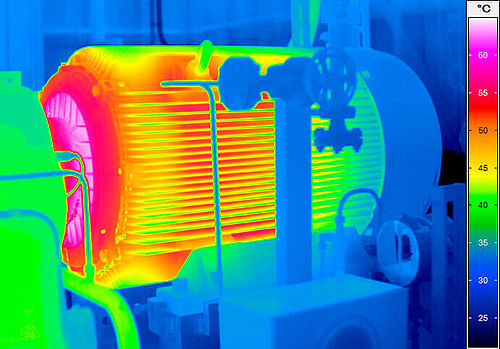

In [3]:
from PIL import Image
from IPython.display import display

my_image = Image.open('Materials/Thermography-1.jpg','r')
display(my_image)

VII. <font color=green>***Estimating the temperature from color image data***<font color=black>

The imported image is fundamentally different from the temperature data we worked with in sections I-V. Instead of temperatures at each pixel, the image only contains data about the color of each pixel. That data is conventionally represented in RGB (red,green,blue) format: for each pixel, values between 0 and 255 are assigned for the red, green, and blue content.

The relationship between the temperature and the colors in the image is defined by the **color map** that was used to produce the image. This image used a type of rainbox color map which ranges from black through the colors of the rainbow (in inverse order), and finally to white. We could try to estimate the temperature of each pixel based on their RGB values, but this relationship is going to be nonlinear and complicated.

One way to improve on the situation is to consider other representations of the color data, analogous to a change of coordinate system in math. In addition to RGB format, color space can also be represented in CMYK format (cyan, yellow, magenta, black; used in the context of color printing and graphic design) or in HSV format (hue, saturation, value; also used in graphic design).

It turns out that **HSV format** is a particularly convenient color representation for reverse-engineering of thermal images because most of the variation reflected in common color maps gets condensed into a single channel. Below, you're going to determine empirically which channel that is.

<font color=purple>***Try it out for yourself:***<font color=black> The code snippet below extracts just the "hue" channel from the image. First, run the code as-is. Then, for each of the six lines that is commented out (i.e. that starts with a #hashtag), remove the hashtag and complete the line to extract and display the appropriate HSV channel. When complete, you should see three significantly different colorings of the original image.
    
*Hint:* The variable `hsv_image` is a 3-dimensional array in which the 1st dimension corresponds to pixel row, the 2nd dimension corresponds to pixel column, and the 3rd dimension corresponds to HSV channel (0 = hue, 1 = saturation, 2 = value).

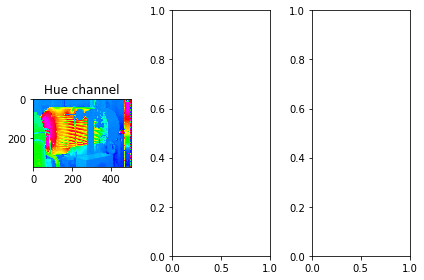

In [6]:
from skimage.color import rgb2hsv

# Convert PIL image into a numpy array format
my_image = array(my_image)

# Extract hue/saturation/value data by pixel and put it into a matrix
hsv_image = rgb2hsv(my_image)
hue_image = hsv_image[:,:,0]
#sat_image =
#val_image =

fig, (axhue, axsat, axval) = plt.subplots(ncols=3)

axhue.imshow(hue_image,cmap='hsv')
axhue.set_title("Hue channel")
#axsat.imshow()
#axsat.set_title()
#axval.imshow()
#axval.set_title()
fig.tight_layout()

<font color=purple>***Question for reflection:***<font color=black> Which HSV channel is most conducive to estimating temperature data from an already-processed thermal image? Briefly discuss how the plots above support your answer.

<font color=purple>***Try it out for yourself:***<font color=black> Now that we've found which HSV channel to use as our proxy for temperature data, we're ready to try to use it. Suppose we have a special interest in the temperature of the outer ring and identify pixel $P=(120,180)$ as a representative location on the ring at which to check the temperature. You can use the labeled axes in the images above to get a sense of where this spot is on the image.
    
In the space below, write a short code snippet that:
    
a. extracts the appropriate HSV channel measurement (let's call it $x$) for pixel $P = (120,180)$.   
    
b. uses the minimum and maximum temperatures on the scale embedded in the image to create a linear mapping $T(x) = ax + b$ that lets you translate between the temperature $T$ and the corresponding HSV channel measurement $x$.
    
c. applies the linear mapping (b) to the HSV channel data (a) to estimate the temperature of the motor in the image at pixel $P$. 

<font color=purple>***Questions for reflection:***<font color=black>

1. Does the temperature that you estimated agree with the value you would read off of the original image? 

2. You may be wondering why we would go through all of this effort to estimate the temperature when we could just look at the image and infer it. Here's an example scenario where it might be useful to automate the process of estimating the temperature:
Suppose that instead of a still image, we were working with a video. The video is just a collection of still images (frames) stitched together. Suggest an explanation for why it might be useful to use a tool like the one you've constructed above to extract an object's temperature from the video instead of inferring it visually.

**Congratulations** on completing the Week 2 notebook! Please remember to save all of your answers and edits before uploading your .ipynb file to the Week 2 assignment on Canvas.